In [1]:
!pip install numba

In [174]:
import random
import numpy as np
import matplotlib.pyplot as plt
from numba import jit

In [175]:
@jit(nopython=True)
def percolacao1(L,prob):
  S = np.zeros((L,L))
  for i in range(L):
    for j in range(L):
      x = random.random()
      if x < prob:
       S[i][j] = 1
  return S

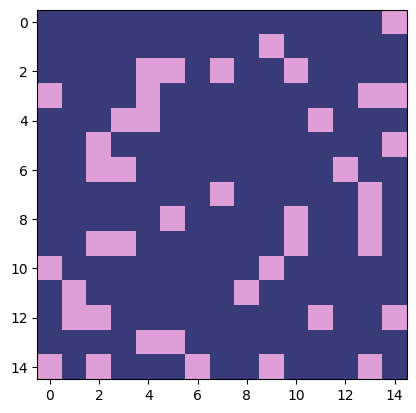

In [185]:
L = 15
prob = 0.8
S = percolacao1(L, prob)

# Gráfico
eixo_x = list(range(L))
plt.imshow(1-S, cmap = 'tab20b')
plt.show()

#######################################################################################

In [195]:
def percolacao(L, prob):
  S = np.zeros((L+2,L+2))
  menor_caminho = 100


  for i in range(1,L+1):
    for j in range(1,L+1):
      x = random.random()
      if x < prob:
        S[i][j] = 1

  for i in range(1,L+1):
    if S[1][i] == 1:
      S[1][i] = 2

  for t in range(2, 2*L):
    for i in range(1, L+1):
      for j in range(1, L+1):
        if S[i][j] == t:
          if S[i][j-1] == 1:
            S[i][j-1] = t+1
          if S[i][j+1] == 1:
            S[i][j+1] = t+1
          if S[i+1][j] == 1:
            S[i+1][j] = t+1
          if S[i-1][j] == 1:
            S[i-1][j] = t+1

  for i in range(L+2):
    if S[15][i] > 1:
      if menor_caminho > S[15][i]:
        menor_caminho = S[15][i]

  return S, menor_caminho

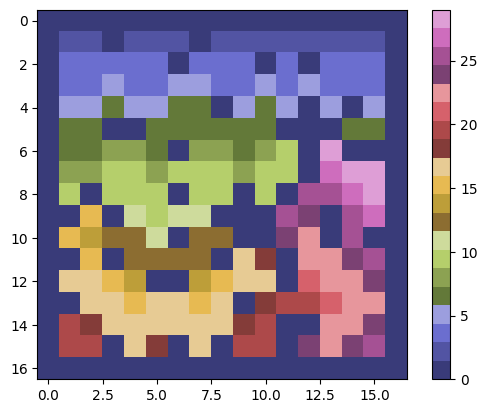

In [196]:
S, menor_caminho = percolacao(L, prob)

# Gráfico
eixo_x = list(range(L))
c = plt.imshow(S, cmap = 'tab20b')
plt.colorbar(c)
plt.show()